In [6]:
import streamlit as st
import numpy as np
import pandas as pd
import plotly.express as px
import fastf1
import os
from fastf1 import plotting
from matplotlib import pyplot as plt
fastf1.Cache.enable_cache('fastf1_cache')  # optional but recommended
results_path = os.path.join(os.getcwd(), "results_cache")

In [9]:
race = fastf1.get_session(2021, "Bahrain" 'R')
race.load()
results = race.results
print(results.head())

c:\Users\piuscarbon\.conda\envs\F1\lib\site-packages\fastf1\events.py:275: FutureWarning: Getting `Event` objects (previously `Session`) through `get_session` has been deprecated.
Use `fastf1.get_event` instead.
  warnings.warn("Getting `Event` objects (previously `Session`) through "


AttributeError: 'Event' object has no attribute 'load'

In [13]:
session = fastf1.get_session(2021, 'Silverstone', 'Q')

In [15]:
session.load()

2022-09-27 15:14:37.989 INFO    root: Loading data for British Grand Prix - Qualifying [v2.3.0]
2022-09-27 15:14:37.994 INFO    root: No cached data found for driver_info. Loading data...
2022-09-27 15:14:37.995 INFO    root: Fetching driver list...
2022-09-27 15:14:38.614 INFO    root: Data has been written to cache!
2022-09-27 15:14:39.321 INFO    root: No cached data found for timing_data. Loading data...
2022-09-27 15:14:39.322 INFO    root: Fetching timing data...
2022-09-27 15:14:40.473 INFO    root: Parsing timing data...
2022-09-27 15:14:41.362 INFO    root: Data has been written to cache!
2022-09-27 15:14:41.363 INFO    root: No cached data found for timing_app_data. Loading data...
2022-09-27 15:14:41.364 INFO    root: Fetching timing app data...
2022-09-27 15:14:41.994 INFO    root: Data has been written to cache!
2022-09-27 15:14:41.995 INFO    root: Processing timing data...
2022-09-27 15:14:42.001 INFO    root: No cached data found for session_status_data. Loading data...

In [37]:
race_df = session.laps

race_df = race_df.sort_values(["Driver", "LapNumber"])
drivers_list = list(race_df["Driver"].unique())
df = pd.DataFrame(np.zeros([len(drivers_list), race_df["LapNumber"].max()+1]))

for index, row in race_df.iterrows():
    df.iloc[drivers_list.index(row["Driver"]), row["LapNumber"]] = row["Compound"]


In [44]:
px.line(race_df, x="LapNumber", y="Compound", color="Driver")

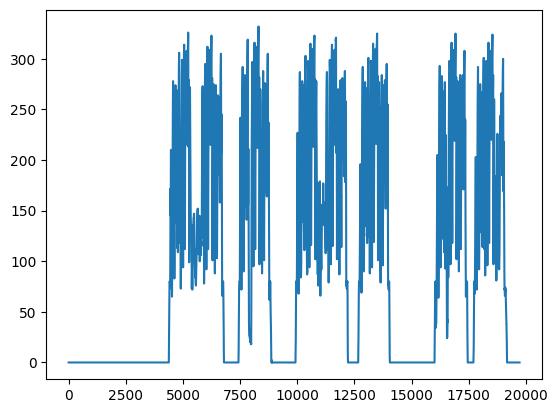

In [22]:
plt.plot(np.linspace(0, len(session.car_data["44"])-1, len(session.car_data["44"])), session.car_data["44"]["Speed"])

In [31]:
session.laps.pick_driver("44").get_pos_data()

c:\Users\piuscarbon\.conda\envs\F1\lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2021-07-16 17:03:36.004,OnTrack,577,4026,0,pos,0 days 00:00:00.025000,0 days 00:17:49.312000
1,2021-07-16 17:03:36.224,OnTrack,616,4054,0,pos,0 days 00:00:00.245000,0 days 00:17:49.532000
2,2021-07-16 17:03:36.444,OnTrack,657,4080,0,pos,0 days 00:00:00.465000,0 days 00:17:49.752000
3,2021-07-16 17:03:36.664,OnTrack,701,4101,0,pos,0 days 00:00:00.685000,0 days 00:17:49.972000
4,2021-07-16 17:03:36.865,OnTrack,742,4117,0,pos,0 days 00:00:00.886000,0 days 00:17:50.173000
...,...,...,...,...,...,...,...,...
16120,2021-07-16 18:02:31.805,OnTrack,-1896,1019,1963,pos,0 days 00:58:55.826000,0 days 01:16:45.113000
16121,2021-07-16 18:02:32.025,OnTrack,-1882,1039,1963,pos,0 days 00:58:56.046000,0 days 01:16:45.333000
16122,2021-07-16 18:02:32.245,OnTrack,-1868,1058,1963,pos,0 days 00:58:56.266000,0 days 01:16:45.553000
16123,2021-07-16 18:02:32.465,OnTrack,-1858,1068,1963,pos,0 days 00:58:56.486000,0 days 01:16:45.773000


In [28]:
ham = session.pos_data["44"]
ver = session.pos_data["44"]

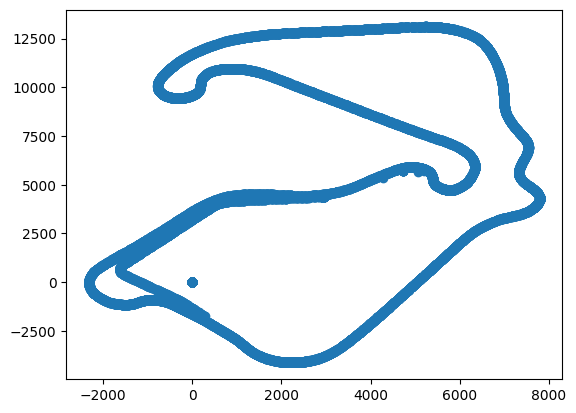

In [26]:
plt.scatter(ham["X"], ham["Y"])

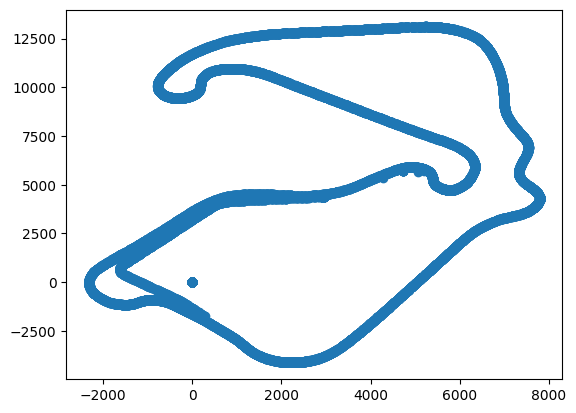

In [29]:
plt.scatter(ver["X"], ver["Y"])